In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
all_points = xr.load_dataarray(r'C:\Users\vovam\Desktop\rotations\Leeat Keren\data\all_data.nc')

## First 7 -CD20; CD4; CD8; CD45; HLA Class II; dsDNA; panCK;

There is no panCK in our dataset so I added panK and also added CD3 as it may be a useful marker (Idan's advice)

In [5]:
needed_channels = ['CD20', 'CD68', 'CD8', 'HLA-DR', 'dsDNA', 'Pan-Keratin', 'Ki67']

In [6]:
channels_data = all_points.sel(channels = needed_channels)

## Turn tensor into matrix of needed shape, remove negatives, and binarise

In [8]:
channels_mat = np.transpose(channels_data.values, [1, 0, 2, 3])
# channels_mat.shape == (7, 38, 2048, 2048)
print(channels_mat.shape)
channels_mat = channels_mat.reshape((7, -1))
# channels_mat.shape == (7, 38*2048*2048)
print(channels_mat.shape)
channels_mat = channels_mat.clip(min = 0)
channels_mat = 1 * (channels_mat > 0)

(7, 38, 2048, 2048)
(7, 159383552)


## Sum over the columns

In [9]:
counts_mat = channels_mat.sum(axis = 0)
print(counts_mat.shape)

(159383552,)


## Plot results of the counts

Text(0.5, 0, 'Number of active channels on given pixel across all points')

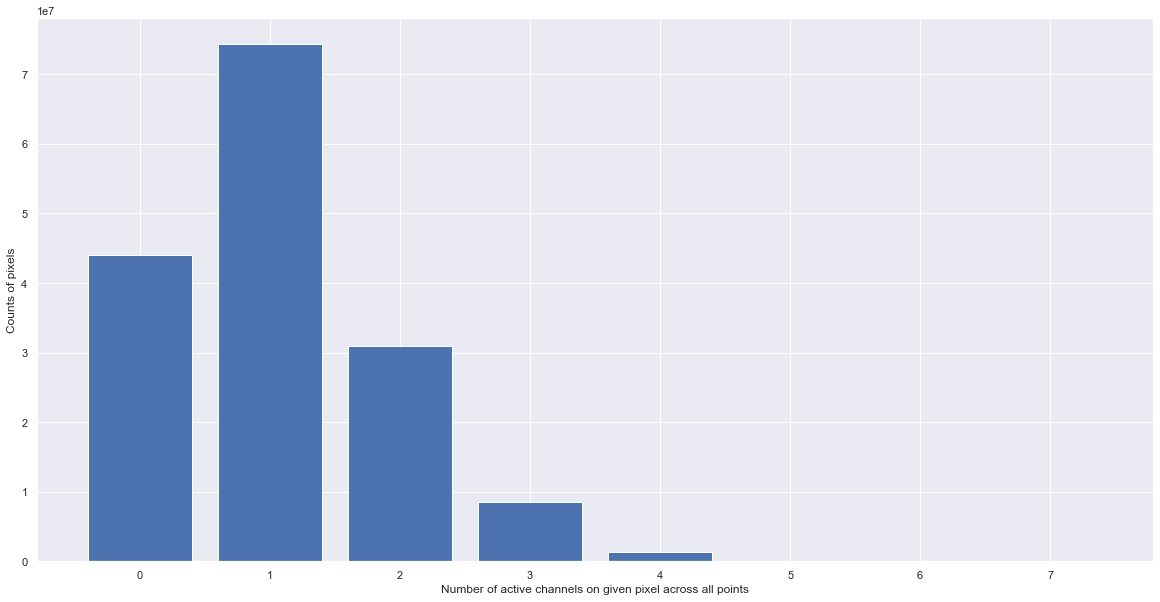

In [10]:
value, counts = np.unique(counts_mat, return_counts=True)
dist = dict(zip(value, counts))
plt.figure(figsize = (20,10))
plt.bar(dist.keys(), dist.values())
plt.ylabel('Counts of pixels')
plt.xlabel('Number of active channels on given pixel across all points')

## Covariance and Correlation matrices of given channels

In [16]:
cov_mat = np.load(r'Z:\vovam\scripts\cov.npy')

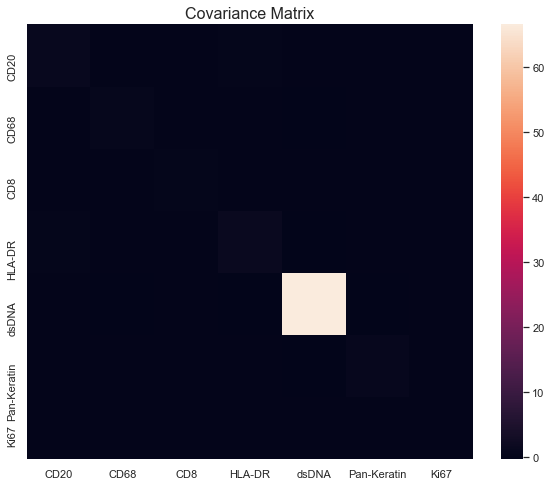

In [17]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 8))
sns.heatmap(cov_mat, 
            xticklabels=needed_channels,
            yticklabels=needed_channels)
plt.title('Covariance Matrix', fontsize=16);

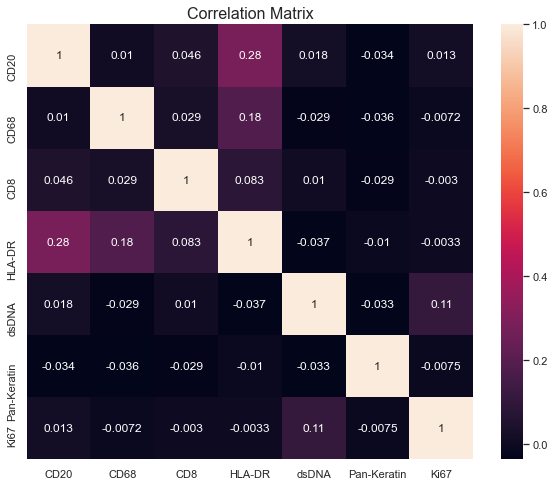

In [18]:
corr_mat = np.load(r'Z:\vovam\scripts\corr.npy')
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, 
            xticklabels=needed_channels,
            yticklabels=needed_channels, annot = True)
plt.title('Correlation Matrix', fontsize=16);